# KDD Cup 1999 
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

# Feature list

# Table 1: Basic features of individual TCP connections.
|feature name | description | type |
|-------------|-------------|------|
|duration |length (number of seconds) of the connection | continuous |
|protocol_type |type of the protocol, e.g. tcp, udp, etc. | discrete |
|service | network service on the destination, e.g., http, telnet, etc. | discrete |
|src_bytes | number of data bytes from source to destination | continuous |
|dst_bytes | number of data bytes from destination to source | continuous |
|flag | normal or error status of the connection | discrete |
|land | 1 if connection is from/to the same host/port; 0 otherwise | discrete |
|wrong_fragment | number of ''wrong'' fragments | continuous |
|urgent | number of urgent packets | continuous |

# Table 2: Content features within a connection suggested by domain knowledge.
| feature name	| description | type |
|---------------|-------------|------|
| hot | number of ''hot'' indicators | continuous |
| num_failed_logins | number of failed login attempts | continuous |
| logged_in | 1 if successfully logged in; 0 otherwise | discrete |
| num_compromised | number of ''compromised'' conditions | continuous |
| root_shell | 1 if root shell is obtained; 0 otherwise | discrete |
| su_attempted | 1 if ''su root'' command attempted; 0 otherwise | discrete |
| num_root | number of ''root'' accesses | continuous |
| num_file_creations | number of file creation operations | continuous |
| num_shells | number of shell prompts | continuous |
| num_access_files | number of operations on access control files | continuous |
| num_outbound_cmds	| number of outbound commands in an ftp session | continuous |
| is_hot_login | 1 if the login belongs to the ''hot'' list; 0 otherwise | discrete |
| is_guest_login | 1 if the login is a ''guest''login; 0 otherwise | discrete |

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [2]:
data_10_percent = 'kddcup.data_10_percent'
data_full = 'kddcup.data'
data = pd.read_csv(data_10_percent, names=utils.names)

# Remove Traffic features computed using a two-second time window
data.drop(utils.traffic_features, inplace=True, axis=1)

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal.


In [4]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.0,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,0.010551,0.007793,2.012718,0.096416,0.011020,0.036482,0.0,0.0,0.037211
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000


# Discrete feature analysis

In [5]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

# data normal = 0, attack = 1

In [6]:
data['label_binary'] = data.label.apply(lambda label: 0 if label == 'normal.' else 1)
data['label_binary'].value_counts()

1    396743
0     97278
Name: label_binary, dtype: int64

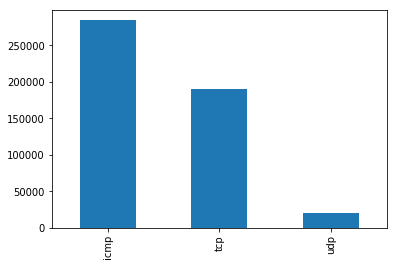

In [7]:
pd.value_counts(data['protocol_type'], sort=True).plot.bar()

In [8]:
data['service'].value_counts()[:10]

ecr_i       281400
private     110893
http         64293
smtp          9723
other         7237
domain_u      5863
ftp_data      4721
eco_i         1642
ftp            798
finger         670
Name: service, dtype: int64

In [9]:
data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

# Categorical features to numeric labels

In [10]:
from sklearn import preprocessing

for categorical_name in utils.categorical_names:
    le = preprocessing.LabelEncoder()
    le.fit(data[categorical_name])
    data[categorical_name + '_num'] = le.fit_transform(data[categorical_name])

# Correlation

In [11]:
#Corr matrix
data[['protocol_type_num']].corrwith(data.label_binary)

protocol_type_num   -0.616601
dtype: float64

In [12]:
data.shape

(494021, 27)